<a href="https://colab.research.google.com/github/Naiya711/naiya711/blob/main/Learner_Notebook_Full_Code_(Naiya_Jayesh_Patel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The info function shows the data type of each column. order_id, customer_id, food_preparation_time, delivery_time are type int64 which makes sense as it is suppossed to be in integer form where as, cost_of_the_order may vary in cents so it is float 64. restaurant_name, cuisine_type, day_of_the_week consists letters which describes them as string/object column. However, Rating column being data type = object looks unusual which is why we will dive more into that column to verify if there are any missing values and also treat them.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
#finding unique values of day of the week to evaluate null values
data['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
#finding unique values of ratings to evaluate null values
data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Converting all Not Given values in ratings to Nan value as well as changing object type to float type
data.loc[data['rating'] == 'Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


In [ ]:
data['rating'] = data['rating'].replace(['Not given'], np.nan)

In [ ]:
data['rating'].unique()

array([nan, '5', '3', '4'], dtype=object)

In [ ]:
data['rating'] = data['rating'].astype(float)

In [ ]:
# Evaluating null values in cuisine type
data['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
# Confirming the successful change of rating data type to float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
Dived into rating column to see if any missing values exists. After analyzing, noted that 736 rows in rating column consists of missing values as 'Not given'. To treat them, all 'not given' has been replaced with np string which is 'nan' means no number assigned. Later on, converted the column into float data type. Also, checked the unique values in day_of_the_week as well as cuisine_type column to assure it does not have any missing values. All the restaurants other than 'nan' consists 3 or above ratings.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The minimum food preparation time after order has been placed is 20 mins and maximum time for preparation is 35 mins. On average it takes 27 mins and 37 secs for food preparation.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
non_rated_orders = data.loc[data['rating'].isnull()== True, 'order_id'].value_counts(dropna=False)

In [ ]:
non_rated_orders.shape[0]

736

#### Observations:
There are total 736 orders which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

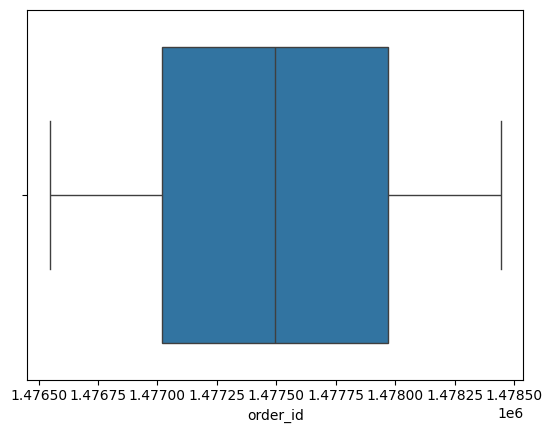

In [ ]:
# Write the code here
# Univariate analysis of order id column
sns.boxplot(data=data, x='order_id');

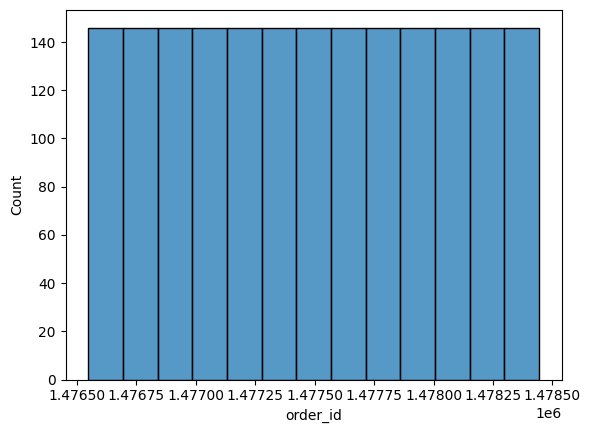

In [ ]:
sns.histplot(data=data, x='order_id');

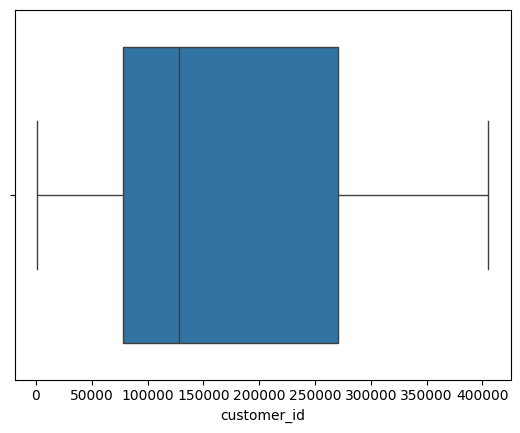

In [ ]:
# Univariate analysis of customer id column
sns.boxplot(data=data, x='customer_id');

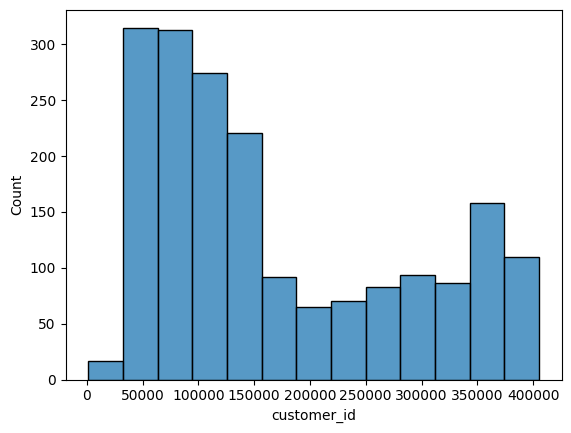

In [ ]:
sns.histplot(data=data, x='customer_id');

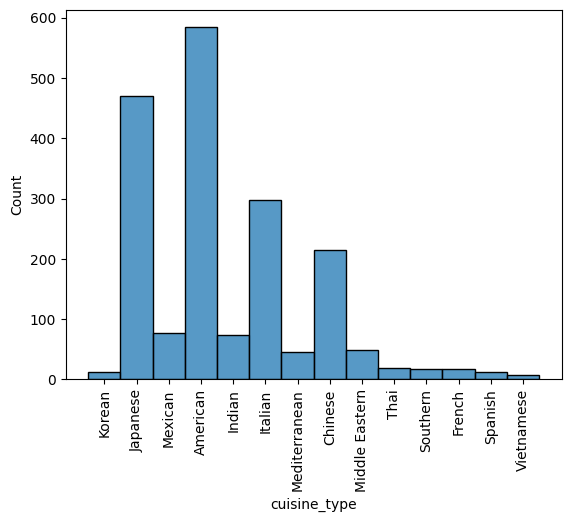

In [ ]:
# Univariate analysis of cuisine type column
sns.histplot(data=data, x='cuisine_type')
plt.xticks(rotation=90);

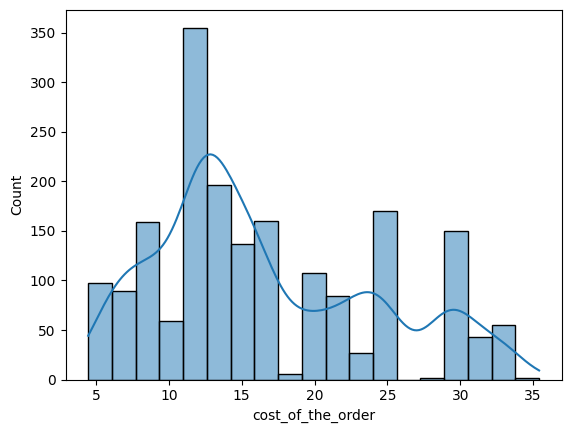

In [ ]:
#Univariate analysis of cost of the order column
sns.histplot(data=data, x='cost_of_the_order', kde=True);

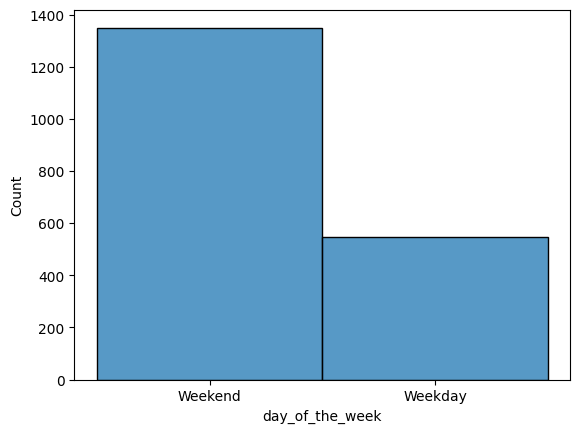

In [ ]:
# Univariate analysis of day of the week column
sns.histplot(data=data, x='day_of_the_week');

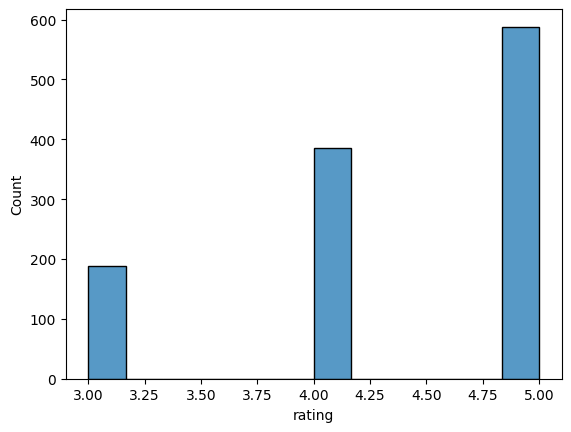

In [ ]:
# Univariate analysis of rating column
sns.histplot(data=data, x='rating');

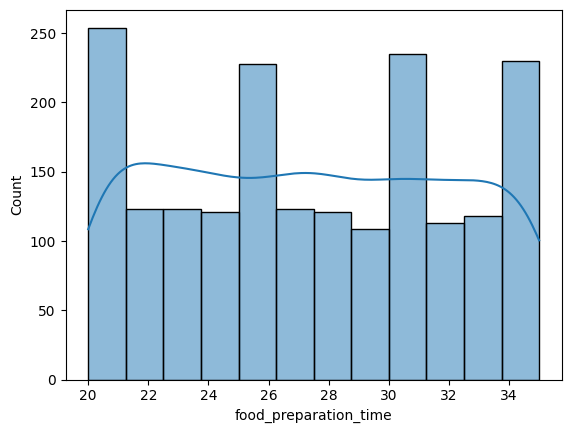

In [ ]:
# Univariate Analysis of food preparation time column
sns.histplot(data=data, x='food_preparation_time', kde=True);

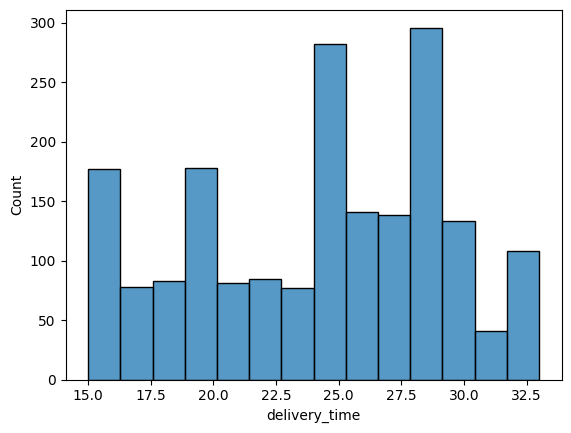

In [ ]:
# Univariate Analysis of delivery time column
sns.histplot(data=data, x='delivery_time');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# Calculating the number of orders made at each restaurants
order_counts = data['restaurant_name'].value_counts()

In [ ]:
# Finding top 5 restaurants with highest number of orders
order_counts.sort_values(ascending=False).head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants with highest number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

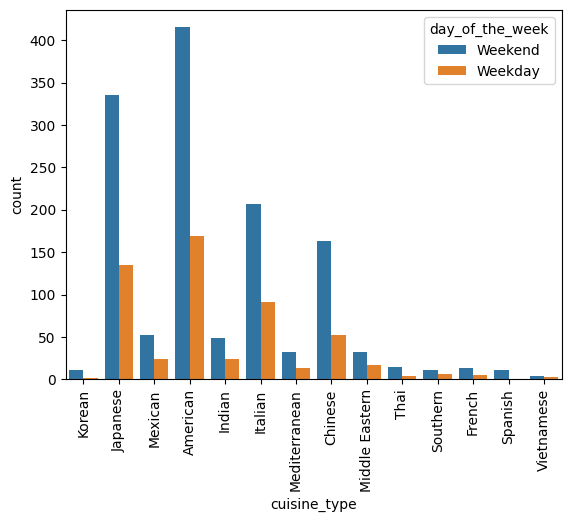

In [ ]:
# Write the code here
# Running Univariate analyis of cuisine type column with hue as day of the week to find out which cuisine is popular on weekends
sns. countplot(data=data, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

#### Observations:
From the above representation, American cuisine is the most popular on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Calculating the number of orders whose costs exceeds 20
order_cost_above_20 = data[data['cost_of_the_order'] > 20].shape[0]

In [ ]:
# Calculating total count of cost in table
total_order_cost = data['cost_of_the_order'].shape[0]

In [ ]:
total_order_cost

1898

In [ ]:
order_cost_above_20

555

In [ ]:
# Dividing order count exceeding 20 with total order cost count and multiplying it by 100 to find the percentage of cost order above 20
percentage_cost_order_above_20 = (order_cost_above_20/total_order_cost)*100

In [ ]:
# printing the percentage cost order above 20
percentage_cost_order_above_20

29.24130663856691

#### Observations:
The percentage of order cost more than 20$ is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
# Calculating average of delivery time column
data['delivery_time'].mean()

24.161749209694417

#### Observations:
The average order delivery time is 24 mins and 16 secs

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Calculating the number of order made by each customer id
discount_voucher_customers = data['customer_id'].value_counts()

In [ ]:
# Printing the top 3 customers who has placed highest orders
discount_voucher_customers.head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Top 3 customer_id who should be given 20% off vouchers for their maximum orders are 52832, 47440, 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


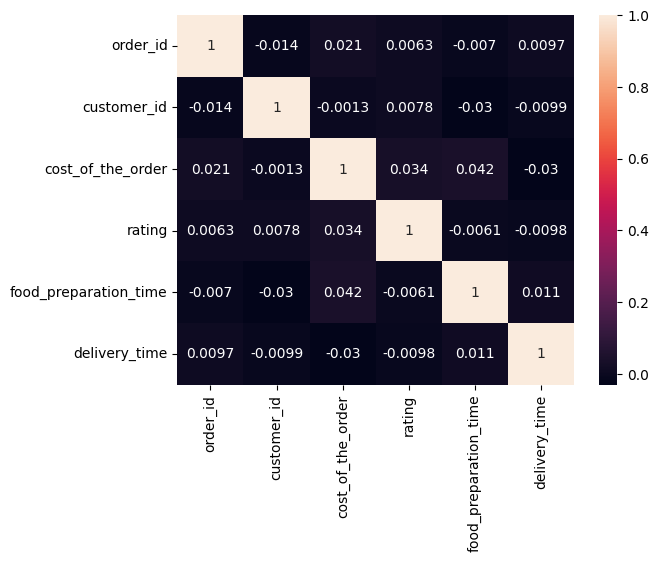

In [ ]:
# Write the code here
# Multivariate analysis of all numerical variables such as order id, customer id, cost of order, rating, food preparation time, delivery time
sns.heatmap(data=data[['order_id', 'customer_id', 'cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr(), annot=True);

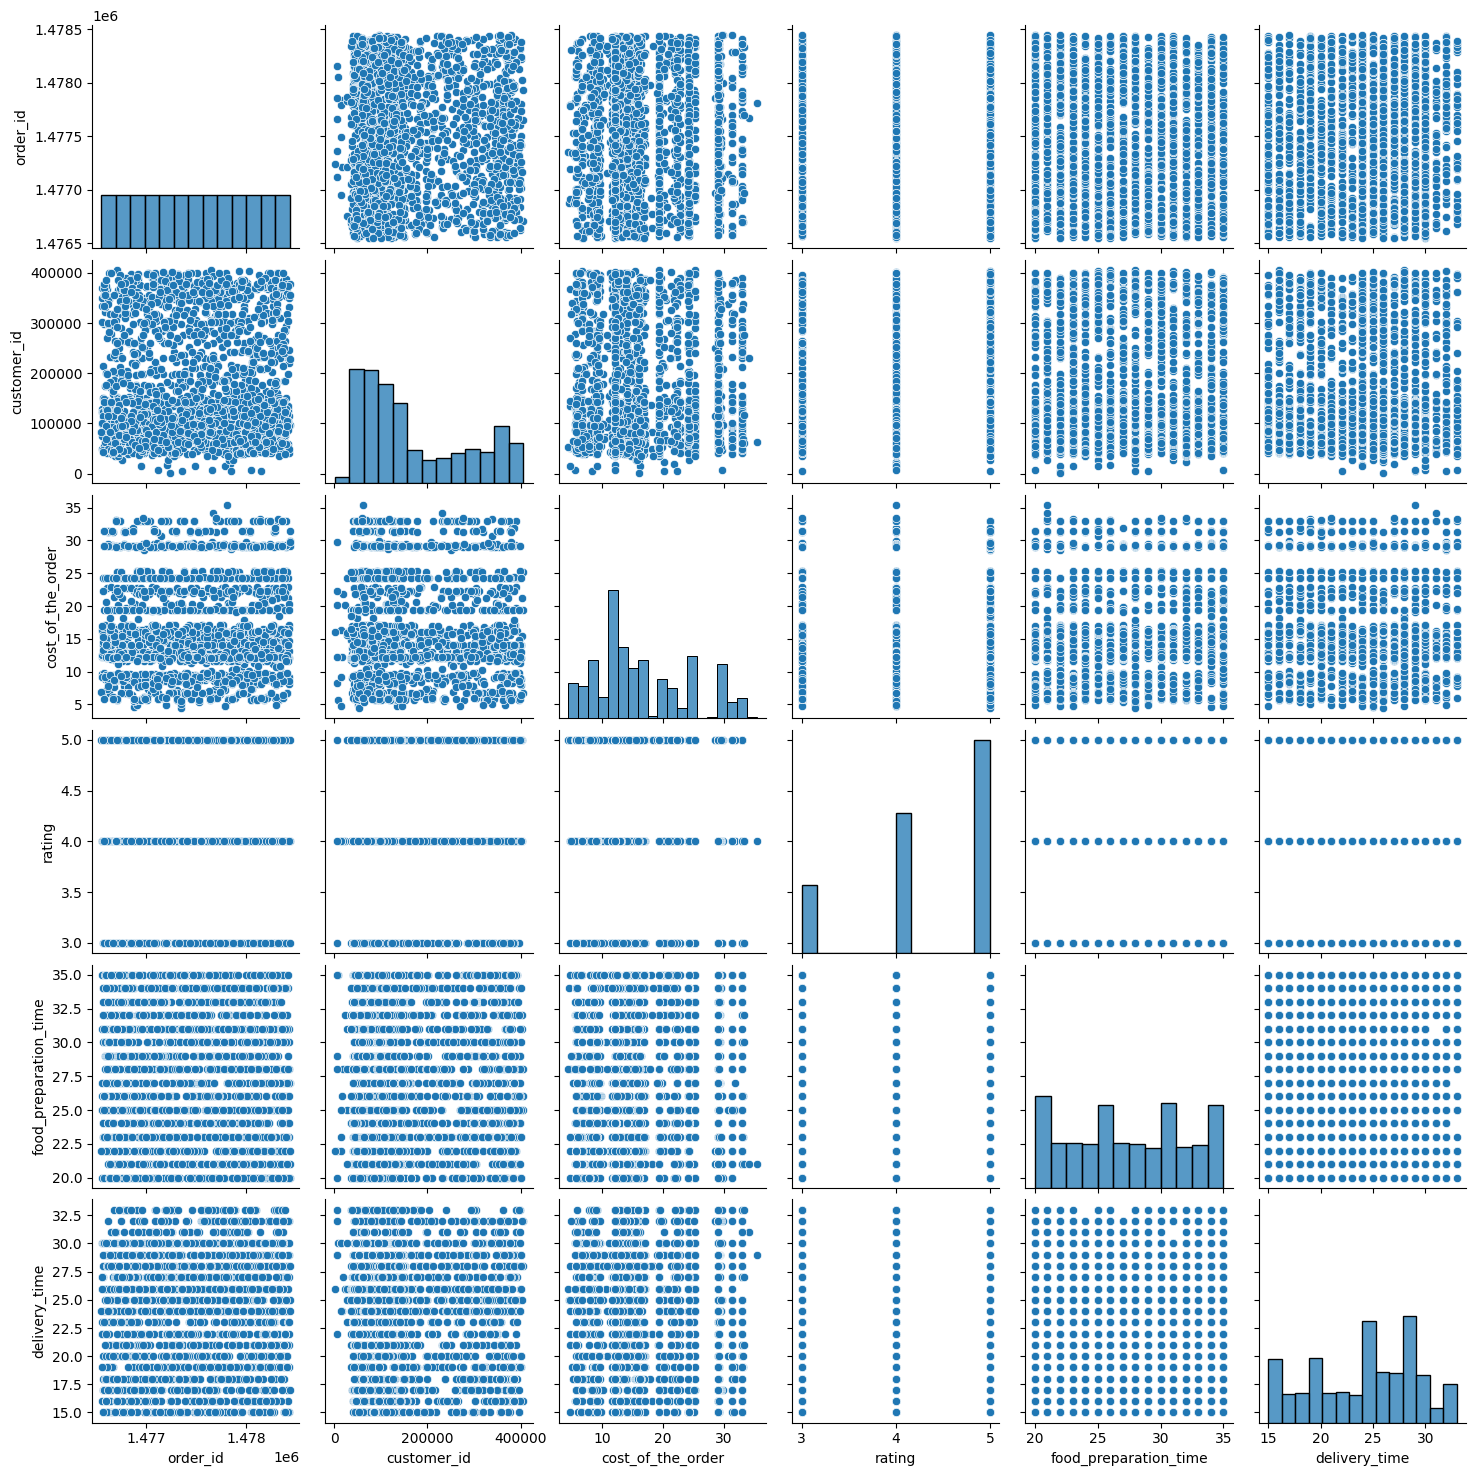

In [ ]:
# Multivariate analysis of all numerical variables
sns.pairplot(data=data[['order_id', 'customer_id', 'cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']]);

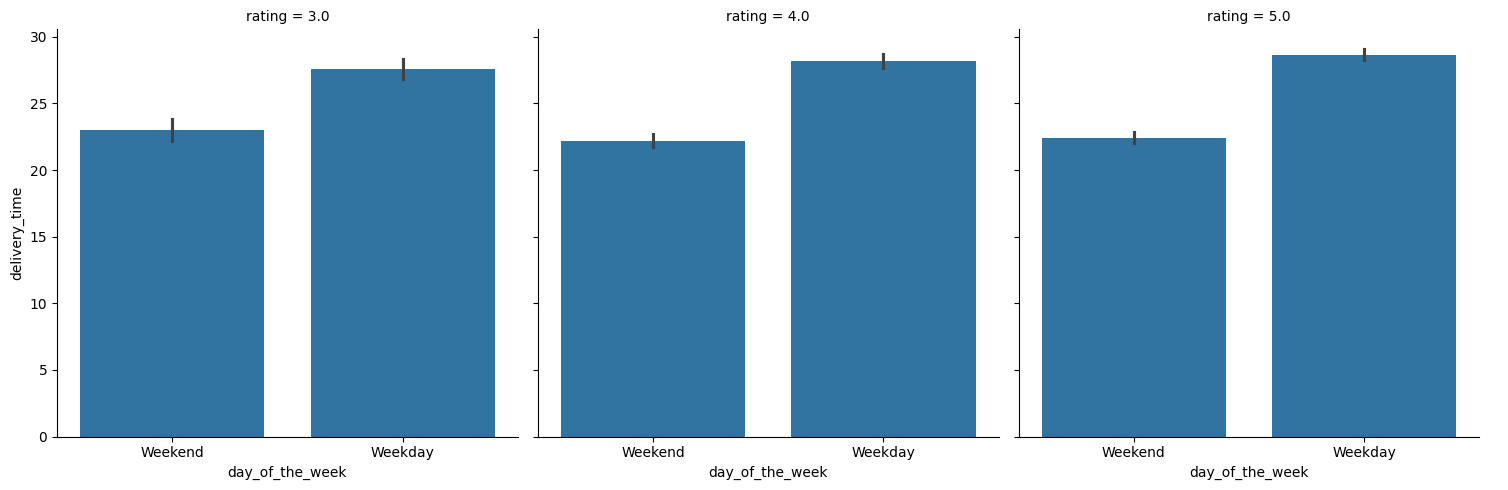

In [ ]:
# Multivariate analysis between numerical and categorial variable
sns.catplot(data=data, x='day_of_the_week', y='delivery_time', col='rating', kind='bar');

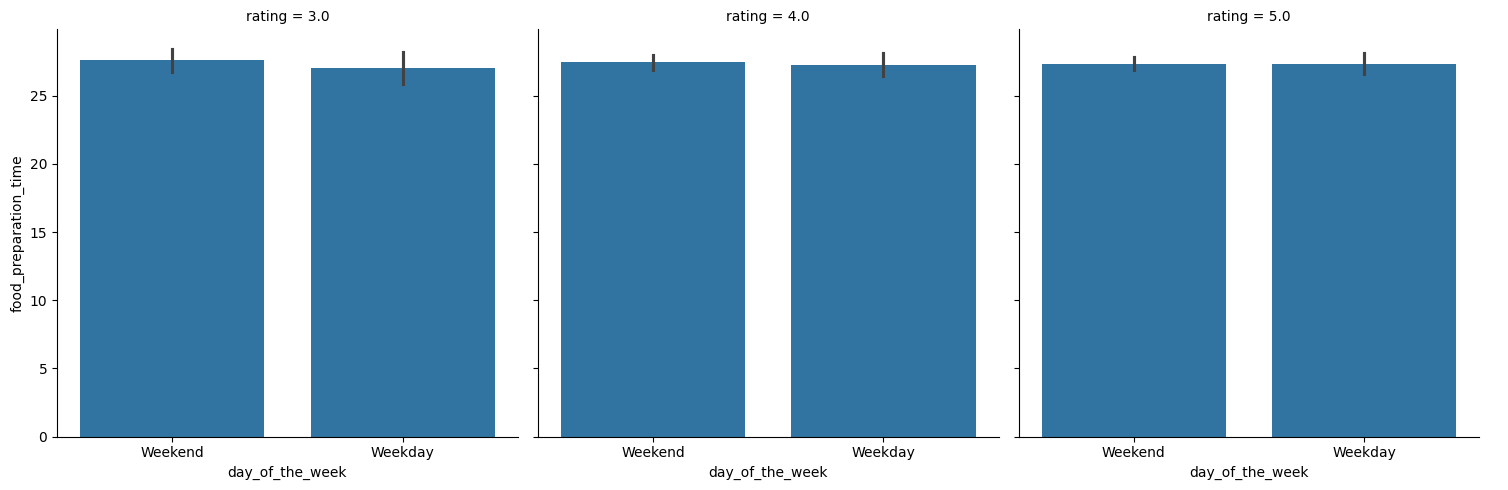

In [ ]:
# Multivariate analysis between numerical and categorical variable
sns.catplot(data=data, x='day_of_the_week', y='food_preparation_time', col='rating', kind='bar');

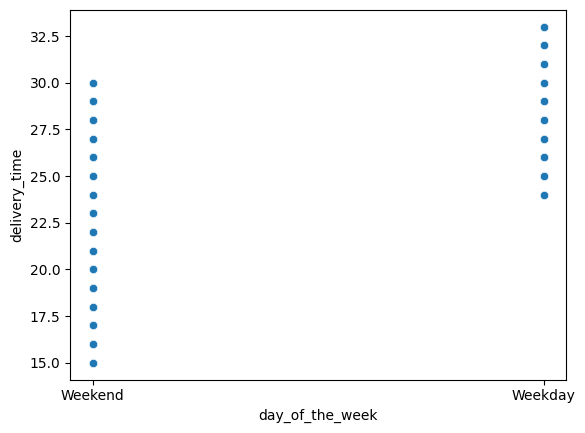

In [ ]:
# Bivariate analysis between numerical and categorical variable with the help of scattered plot
sns.scatterplot(data=data, x='day_of_the_week', y='delivery_time');

<Figure size 3000x2000 with 0 Axes>

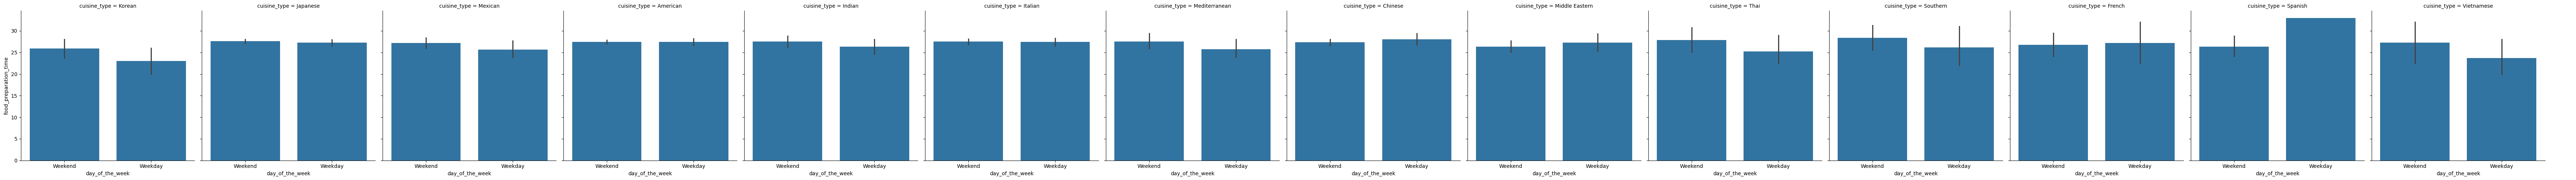

In [ ]:
# Multivariate analysis between numerical and categorical variable
plt.figure(figsize=(30,20))
sns.catplot(data=data, x='day_of_the_week', y='food_preparation_time', col='cuisine_type', kind='bar');

<Figure size 3000x2000 with 0 Axes>

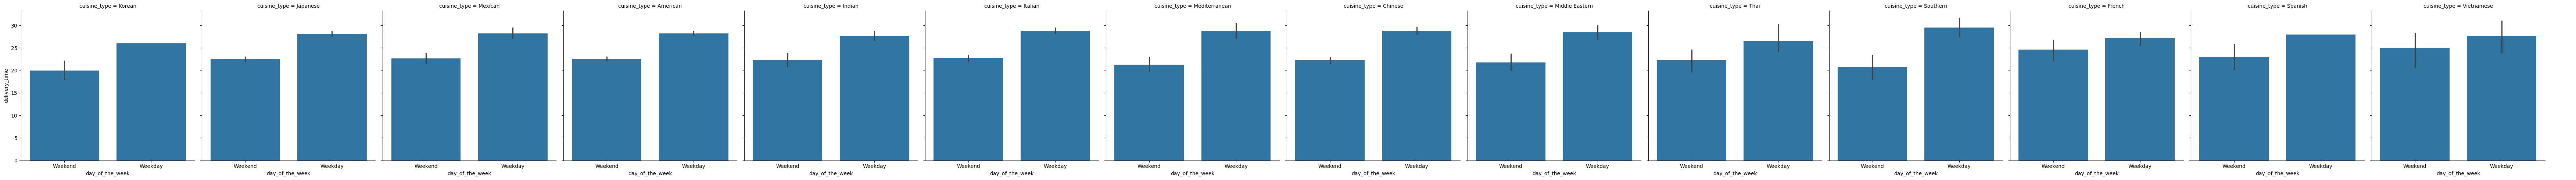

In [ ]:
# Multivariate analysis between numerical and categorical variable
plt.figure(figsize=(30,20))
sns.catplot(data=data, x='day_of_the_week', y='delivery_time', col='cuisine_type', kind='bar');

<Figure size 3000x2000 with 0 Axes>

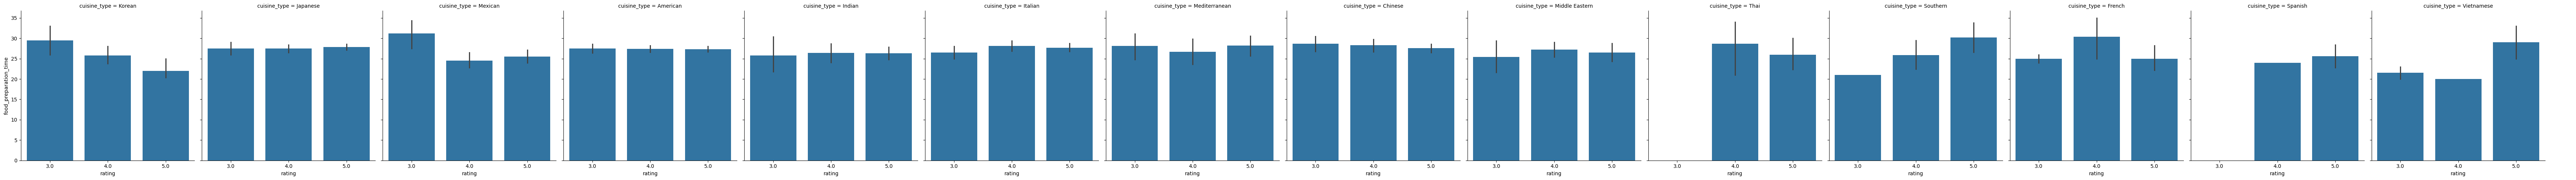

In [ ]:
# Multivariate analysis between numerical and categorical variables
plt.figure(figsize=(30,20))
sns.catplot(data=data, x='rating', y='food_preparation_time', col='cuisine_type', kind='bar');

<Figure size 3000x2000 with 0 Axes>

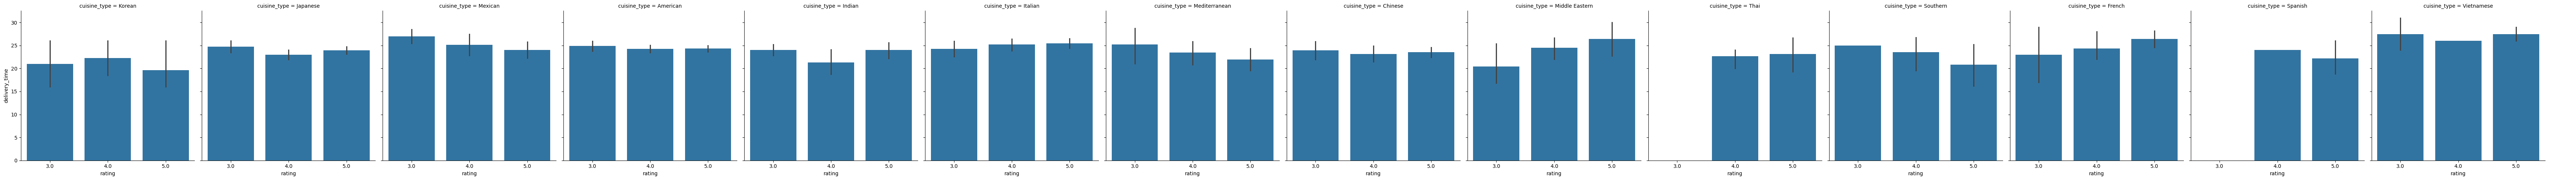

In [ ]:
# Multivariate analysis between numerical and categorical variables
plt.figure(figsize=(30,20))
sns.catplot(data=data, x='rating', y='delivery_time', col='cuisine_type', kind='bar');

<Figure size 3000x2000 with 0 Axes>

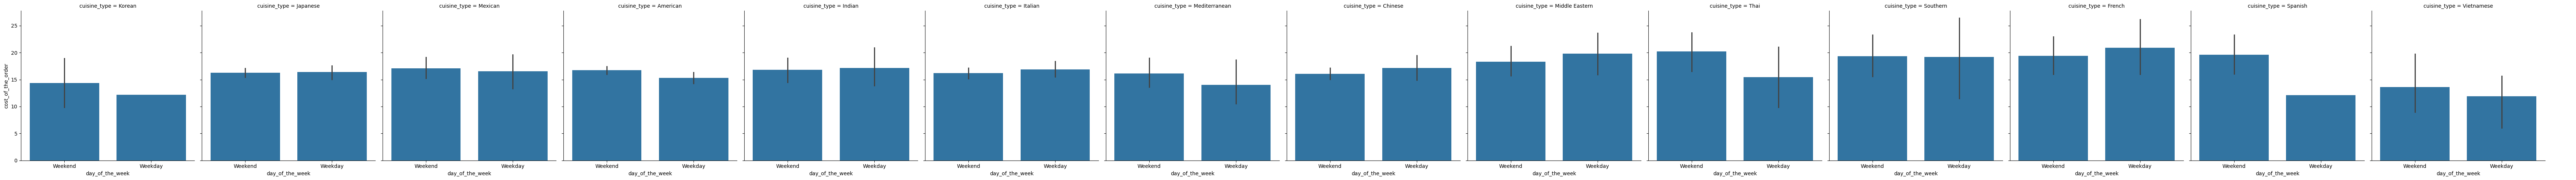

In [ ]:
# Multivariate analysis between numerical and categorical variables
plt.figure(figsize=(30,20))
sns.catplot(data=data, x='day_of_the_week', y='cost_of_the_order', col='cuisine_type', kind='bar');

<Figure size 3000x2000 with 0 Axes>

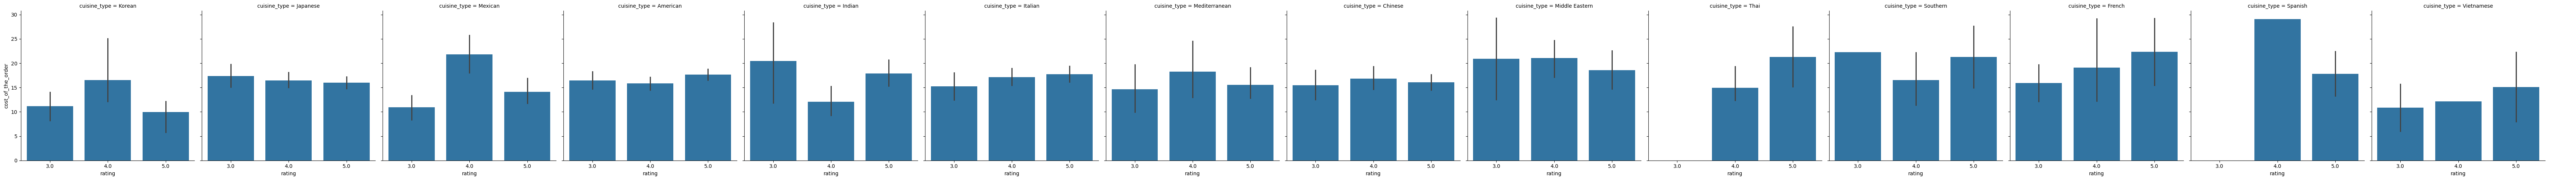

In [ ]:
# Multivariate analysis between numerical and categorical variables
plt.figure(figsize=(30,20))
sns.catplot(data=data, x='rating', y='cost_of_the_order', col='cuisine_type', kind='bar');

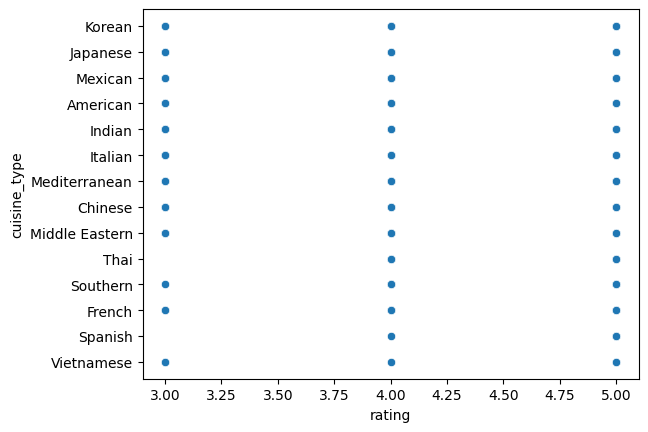

In [ ]:
# Multivariate analysis between numerical and categorical variables
sns.scatterplot(data=data, x='rating', y='cuisine_type');

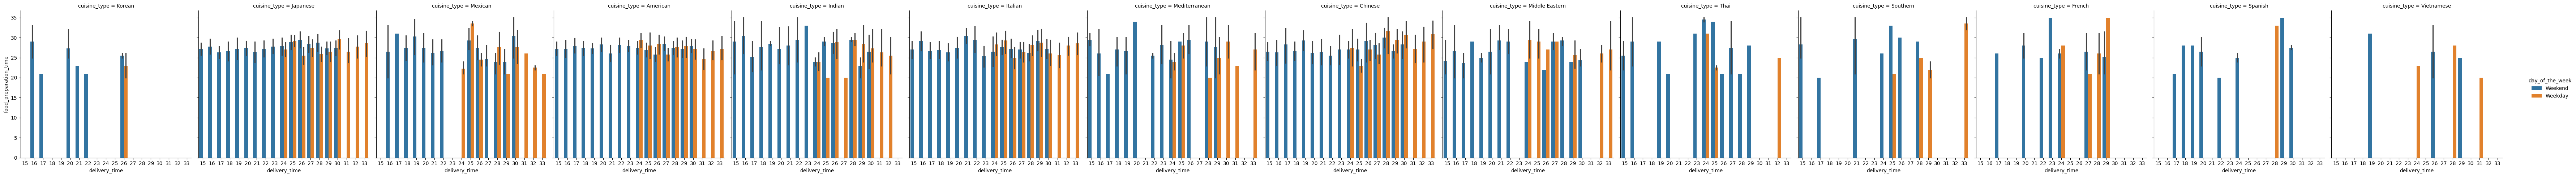

In [ ]:
# Multivariate analysis between numerical and categorical variables
sns.catplot(data=data, x='delivery_time', y='food_preparation_time', col='cuisine_type', hue='day_of_the_week', kind='bar');

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filtering the restaurants whose ratings are Nan
filtered_data = data.dropna(subset=['rating'])

In [ ]:
# Grouping filtered restaurants with total count of rating for each restaurant
rating_count = filtered_data.groupby(['restaurant_name'])['rating'].sum().reset_index()

In [ ]:
print(rating_count)

      restaurant_name  rating
0          'wichcraft     5.0
1           12 Chairs     9.0
2     5 Napkin Burger     8.0
3           67 Burger     5.0
4                Amma     9.0
..                ...     ...
151    Zero Otto Nove     4.0
152              brgr     3.0
153        da Umberto     5.0
154  ilili Restaurant    54.0
155         indikitch     9.0

[156 rows x 2 columns]


In [ ]:
# Naming the total rating count column as rating counts
rating_count.columns = ['restaurant_name', 'rating_counts']

In [ ]:
print(rating_count)

      restaurant_name  rating_counts
0          'wichcraft            5.0
1           12 Chairs            9.0
2     5 Napkin Burger            8.0
3           67 Burger            5.0
4                Amma            9.0
..                ...            ...
151    Zero Otto Nove            4.0
152              brgr            3.0
153        da Umberto            5.0
154  ilili Restaurant           54.0
155         indikitch            9.0

[156 rows x 2 columns]


In [ ]:
# Filtering the restaurants whose rating count is above 50
filtered_restaurants = rating_count.loc[rating_count['rating_counts']>50]

In [ ]:
# Grouping the restaurants and finding the average rating for each
average_ratings = filtered_data.groupby('restaurant_name')['rating'].mean().reset_index()

In [ ]:
# Grouping the average rating of restaurant with filtered restaurants whose rating count is above 50
average_ratings = average_ratings[average_ratings['restaurant_name'].isin(filtered_restaurants['restaurant_name'])]

In [ ]:
# Sorting the average rating from highest to lowest
average_ratings.sort_values(by='rating', ascending=False)

,restaurant_name,rating
124,Sushi of Gari Tribeca,4.615385
18,Blue Ribbon Sushi Bar & Grill,4.590909
49,Five Guys Burgers and Fries,4.555556
132,The Meatball Shop,4.511905
57,Han Dynasty,4.434783
68,J. G. Melon,4.416667
134,The Smile,4.416667
126,Tamarind TriBeCa,4.400000
125,TAO,4.357143
88,Nobu Next Door,4.347826


In [ ]:
average_ratings.shape

(25, 2)

###Observation: There are total 25 restaurants which has rating count above 50 as well as average rating of above 4 are eligible for receiving promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Defining the function calculate revenue and conditioning it to calculate the total revenue
def calculate_revenue(cost_of_the_order):
  if cost_of_the_order > 20:
    return cost_of_the_order*0.25
  elif cost_of_the_order > 5:
    return cost_of_the_order*0.15
  else:
    return 0

In [ ]:
# Applying the function to the cost of order column
data['revenue'] = data['cost_of_the_order'].apply(calculate_revenue)

In [ ]:
# Adding the total calculated revenue
net_revenue = data['revenue'].sum()

In [ ]:
net_revenue

6166.303

#### Observations:
The net revenue of the company after 25% discount on order cost above 20 as well as 15% discount on order cost above 5 is $6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Calculating the total preparation time by adding the delivery time and food preparation time
data['total_preparation_time'] = data['delivery_time'] + data['food_preparation_time']

In [ ]:
# Filtering the data where total preparationg time exceed 60 minutes
more_than_60 = data[data['total_preparation_time'] > 60].shape[0]

In [ ]:
# Calculating the total order count
total_orders = data.shape[0]

In [ ]:
# Calculating the percentage of order whose total preparating time is above 60
percentage_of_order_more_than_60 = (more_than_60/ total_orders)*100

In [ ]:
print(percentage_of_order_more_than_60)

10.537407797681771


#### Observations:
10.53% of orders takes more than 60 minutes to deliver from the time order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Grouping the day of the week by counting the average of delivery time on weekdays as well as weekends
data.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The average delivery time for weekdays is 28 mins 34 secs and for weekends is 22 mins 47 secs.

### Conclusion and Recommendations
The average delivery time for weekdays are higher compare to weekends. There could be various reason of delivery taking longer on weekdays such as traffic congestion, limited staff availability, large volume of orders on weekdays etc. As a recommendation, restaurants can hire sufficient staff to fulfil the requirement for efficient food deliveries.  

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. There are total 1898 data regarding restaurants in New York, their order ID, customer ID, ratings, Cuisine, cost, the day order was placed, Food preparation time and Delivery time.
2. There are 736 data which is not rated.
3. There are total 25 restaurants which has more than 50 rating counts as well as average rating exceeds 4.
4. The average delivery time of weekend is lower than weekdays which means it takes longer to deliver food on weekdays compared to weekends.
5. Ratings and cost of the order are slightly positively correlated with each other
6. Most orders are placed on weekends compared to weekdays.
7. American cuisine is highly preffered among customers on weekends as well as weekdays followed by Japanese cuisine.
8. Veitamese cuisine is less preffered among customers as it has least order counts.
9. In most cases, if Food preparation time is less, the higher will be rating such as cuisine type- Korean, Mexican, Thai has higher rating with low food preparating time.
10. In most cases, if delivery time is higher, the ratings will be lower such as in cuisine type- Mexican, Mediterranean, Southern, Spanish has low rating due to higher delivery time.
11. Most highest ratings given by customers are between 4.5 to 5.
12. There are few customers who have placed order through app more than 5 times.

### Recommendations:

1. To reduce the delivery time during weekdays, food aggregator company can hire suffcient delivery drivers to avoid delayed deliveries of food.
2. In case of traffic congestion which might affect delivery time, customers can be notified while placing the order on app about the possibility of longer delivery time due to above reason. It can reduce the chances of customer giving low ratings due to extended delivery time.
3. As mentioned above, American cuisine is famous among customers so company can look into adding or tying up with more restaurants which offers such cuisine to enhance restaurants options for customers.
4. Company can offer discounts to customers who exceeds certain amount of orders made through the app for their long term loyalty and they must be treated as a valuable asset for the company.
5. Company can find better alternative for ratings such as customers might get rewards on rating n number of orders. It will induce maximum customers to rate the order after every delivery.
